# Treinamento e Avaliação de Modelos - Heart Disease Prediction

Este notebook implementa e compara três modelos de machine learning:
- Regressão Logística
- Random Forest
- Support Vector Machine (SVM)


In [1]:
# Importações
import sys
sys.path.append('../src')

from main import HeartDiseasePredictor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Inicializar predictor
predictor = HeartDiseasePredictor('../data/heart.csv')

# Carregar e explorar dados
predictor.load_data()
predictor.explore_data()


Carregando dados...
Dataset carregado: 918 amostras, 12 características

=== ANÁLISE EXPLORATÓRIA ===

Primeiras linhas do dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [3]:
# Pré-processar dados
predictor.preprocess_data()



=== PRÉ-PROCESSAMENTO ===

Variáveis numéricas: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Variáveis categóricas: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Variável categórica Sex codificada
Variável categórica ChestPainType codificada
Variável categórica RestingECG codificada
Variável categórica ExerciseAngina codificada
Variável categórica ST_Slope codificada

Dados divididos:
Treino: 642 amostras
Teste: 276 amostras
Normalização aplicada (StandardScaler)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [4]:
# Treinar modelos
predictor.train_models()



=== TREINAMENTO DOS MODELOS ===

Treinando Regressão Logística...
✓ Regressão Logística treinada
Treinando Random Forest...
✓ Random Forest treinado
Treinando SVM (RBF)...
✓ SVM treinado


{'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
 'Random Forest': RandomForestClassifier(max_depth=10, random_state=42),
 'SVM': SVC(probability=True, random_state=42)}

In [5]:
# Avaliar modelos
predictor.evaluate_models()



=== AVALIAÇÃO DOS MODELOS ===


Logistic Regression:
  Accuracy:  0.8551
  Precision: 0.8599
  Recall:    0.8824
  F1-Score:  0.8710
  AUC-ROC:   0.9010

  Matriz de Confusão:
   101    22
    18   135

Random Forest:
  Accuracy:  0.8913
  Precision: 0.8917
  Recall:    0.9150
  F1-Score:  0.9032
  AUC-ROC:   0.9418

  Matriz de Confusão:
   106    17
    13   140

SVM:
  Accuracy:  0.8949
  Precision: 0.8875
  Recall:    0.9281
  F1-Score:  0.9073
  AUC-ROC:   0.9365

  Matriz de Confusão:
   105    18
    11   142


{'Logistic Regression': {'accuracy': 0.855072463768116,
  'precision': 0.8598726114649682,
  'recall': 0.8823529411764706,
  'f1_score': 0.8709677419354839,
  'auc': 0.9010043041606887,
  'confusion_matrix': array([[101,  22],
         [ 18, 135]]),
  'predictions': array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
         1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
         1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
         1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
         0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
         1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
         1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
         1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
         1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
         0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 

In [6]:
# Validação cruzada
predictor.cross_validation(cv=5)



=== VALIDAÇÃO CRUZADA (5-fold) ===

Logistic Regression:
  Accuracy média: 0.8349 (±0.0461)
Random Forest:
  Accuracy média: 0.8427 (±0.0284)
SVM:
  Accuracy média: 0.8473 (±0.0418)



Matrizes de confusão salvas em 'confusion_matrices.png'


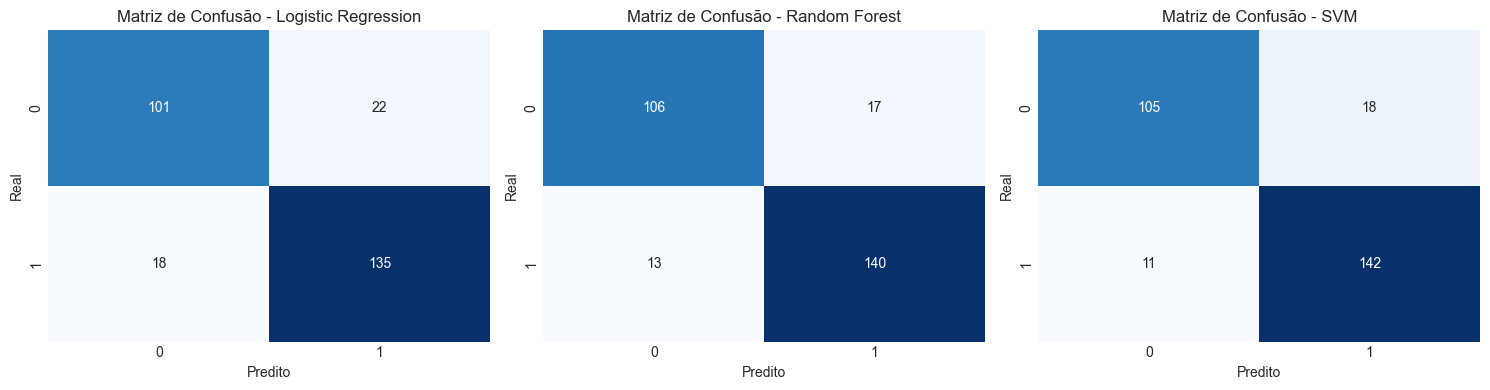

Curvas ROC salvas em 'roc_curves.png'


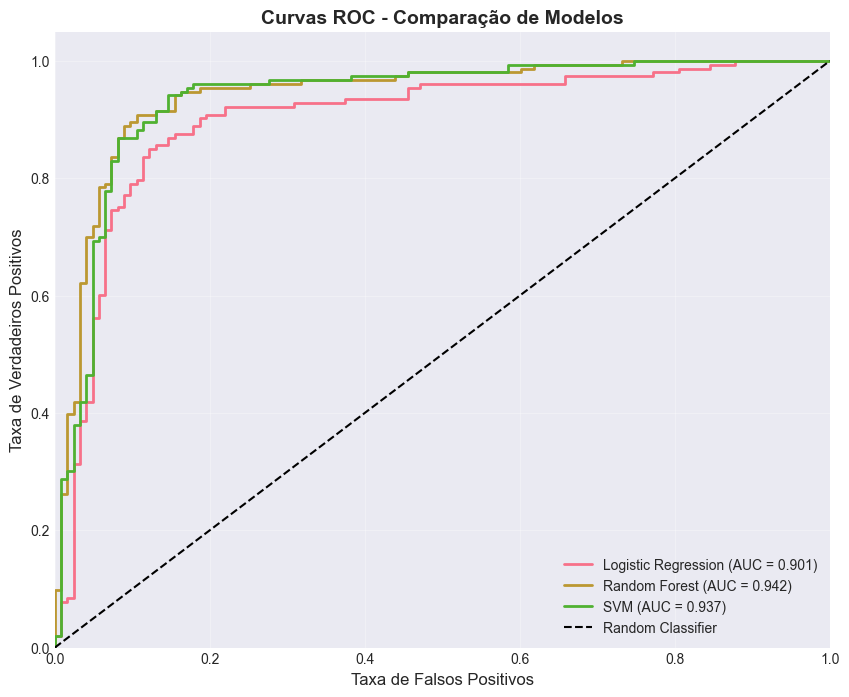

Importância de características salva em 'feature_importance.png'


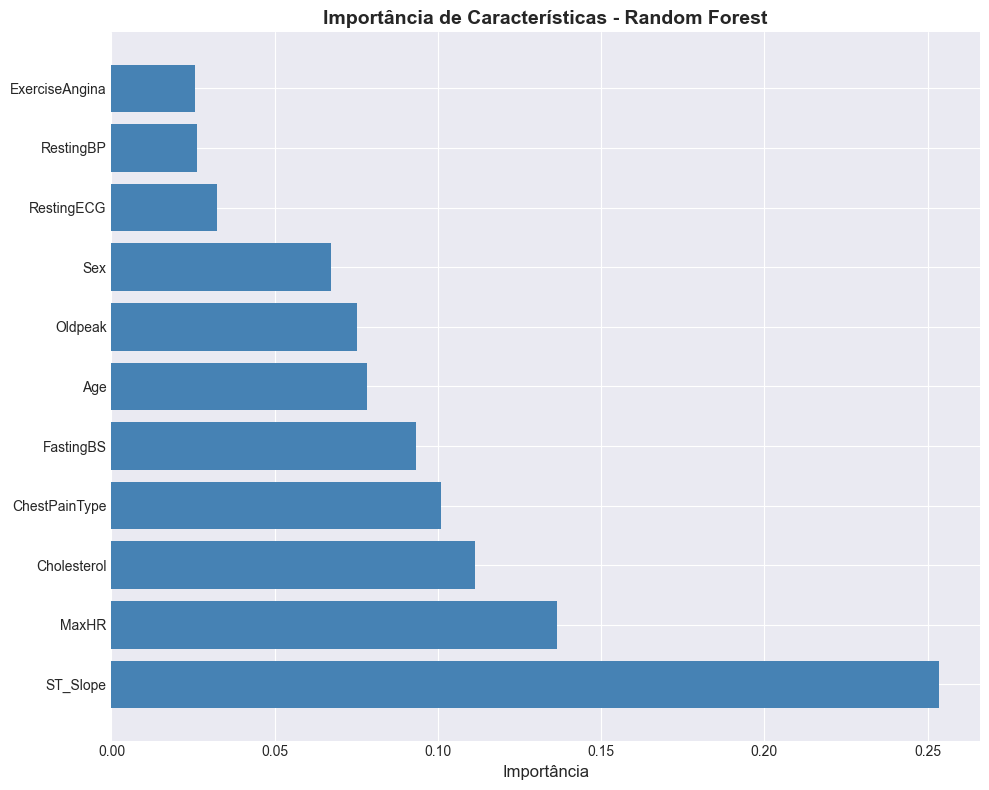

In [7]:
# Visualizações
predictor.plot_confusion_matrices()
predictor.plot_roc_curves()
predictor.plot_feature_importance()


In [8]:
# Tabela comparativa
comparison_df = predictor.generate_comparison_table()
print("\nTabela Comparativa:")
print(comparison_df)



=== TABELA COMPARATIVA ===

             Modelo Accuracy Precision Recall F1-Score AUC-ROC
Logistic Regression   0.8551    0.8599 0.8824   0.8710  0.9010
      Random Forest   0.8913    0.8917 0.9150   0.9032  0.9418
                SVM   0.8949    0.8875 0.9281   0.9073  0.9365

Tabela comparativa salva em 'results_comparison.csv'

Tabela Comparativa:
                Modelo Accuracy Precision  Recall F1-Score AUC-ROC
0  Logistic Regression   0.8551    0.8599  0.8824   0.8710  0.9010
1        Random Forest   0.8913    0.8917  0.9150   0.9032  0.9418
2                  SVM   0.8949    0.8875  0.9281   0.9073  0.9365
